In [18]:
import importlib
from torch.autograd import Variable
import torch
import pickle
import pNN_aging_aware as pnn
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import training
import PNN_Setting as ps
import evaluation
sys.path.append(os.path.join(os.getcwd(), 'Aging_Model'))

with open(os.path.join(os.getcwd(), 'Aging_Model', 'exp_aging_model.p'), 'rb') as f:
    age_generator = pickle.load(f)

In [2]:
datapath = os.path.join(os.getcwd(), 'Datasets', 'PMLC',
                        'data_processed', 'Dataset_Pendigits.p')
with open(datapath, 'rb') as f:
    dataset = pickle.load(f)
X = dataset['X'].float()
y = dataset['y']
M, N_features, N_class = X.shape[0], X.shape[1], torch.max(
    torch.unique(y)).item()+1
X.shape, y.shape, M, N_features, N_class

(torch.Size([10992, 16]), torch.Size([10992]), 10992, 16, 10)

In [3]:
# normalization
X = X / (torch.max(X, axis=0)[0] - torch.min(X, axis=0)[0])
X = X - torch.min(X, axis=0)[0]
torch.min(X), torch.max(X)

(tensor(0.), tensor(1.))

In [4]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# generate tensordataset
dataset = TensorDataset(X, y)

# split
train_rate = 0.6
test_rate = 0.2
M_train = int(M*train_rate)
M_test = int(M*test_rate)
train_data, rest_data = random_split(dataset, [M_train, M-M_train], generator=torch.Generator().manual_seed(19950102))
test_data, valid_data = random_split(rest_data, [M_test, M-M_train-M_test], generator=torch.Generator().manual_seed(19950102))
len(train_data), len(test_data), len(valid_data)

(6595, 2198, 2199)

In [5]:
# batch
train_loader = DataLoader(train_data, batch_size=len(train_data))
test_loader = DataLoader(test_data, batch_size=len(test_data))
valid_loader = DataLoader(valid_data, batch_size=len(valid_data))

In [12]:
N_Hidden = 16
m = 0.3
T = 0.1
K = 5  # number of time sampling
M = 40  # number of model sampling
K_test = 5
M_test = 10

# Evaluation

In [14]:
with open('./pendigitresult/NN_16.p', 'rb') as f:
    NN = pickle.load(f)

In [15]:
with open('./pendigitresult/PNN_16.p', 'rb') as f:
    PNN = pickle.load(f)

In [16]:
with open('./pendigitresult/AAPNN_16.p', 'rb') as f:
    AAPNN = pickle.load(f)

In [19]:
mean_acc_PNN, std_acc_PNN, mean_maa_PNN, std_maa_PNN = evaluation.FullEvaluation(PNN, valid_loader)

  0%|          | 0/500 [00:00<?, ?it/s]

evaluating on the 0-th model.
evaluating on the 10-th model.
evaluating on the 20-th model.
evaluating on the 30-th model.
evaluating on the 40-th model.
evaluating on the 50-th model.
evaluating on the 60-th model.
evaluating on the 70-th model.
evaluating on the 80-th model.
evaluating on the 90-th model.
evaluating on the 100-th model.
evaluating on the 110-th model.
evaluating on the 120-th model.
evaluating on the 130-th model.
evaluating on the 140-th model.
evaluating on the 150-th model.
evaluating on the 160-th model.
evaluating on the 170-th model.
evaluating on the 180-th model.
evaluating on the 190-th model.
evaluating on the 200-th model.
evaluating on the 210-th model.
evaluating on the 220-th model.
evaluating on the 230-th model.
evaluating on the 240-th model.
evaluating on the 250-th model.
evaluating on the 260-th model.
evaluating on the 270-th model.
evaluating on the 280-th model.
evaluating on the 290-th model.
evaluating on the 300-th model.
evaluating on the 3

In [20]:
mean_acc_AAPNN, std_acc_AAPNN, mean_maa_AAPNN, std_maa_AAPNN = evaluation.FullEvaluation(AAPNN, valid_loader)

  0%|          | 0/500 [00:00<?, ?it/s]

evaluating on the 0-th model.
evaluating on the 10-th model.
evaluating on the 20-th model.
evaluating on the 30-th model.
evaluating on the 40-th model.
evaluating on the 50-th model.
evaluating on the 60-th model.
evaluating on the 70-th model.
evaluating on the 80-th model.
evaluating on the 90-th model.
evaluating on the 100-th model.
evaluating on the 110-th model.
evaluating on the 120-th model.
evaluating on the 130-th model.
evaluating on the 140-th model.
evaluating on the 150-th model.
evaluating on the 160-th model.
evaluating on the 170-th model.
evaluating on the 180-th model.
evaluating on the 190-th model.
evaluating on the 200-th model.
evaluating on the 210-th model.
evaluating on the 220-th model.
evaluating on the 230-th model.
evaluating on the 240-th model.
evaluating on the 250-th model.
evaluating on the 260-th model.
evaluating on the 270-th model.
evaluating on the 280-th model.
evaluating on the 290-th model.
evaluating on the 300-th model.
evaluating on the 3

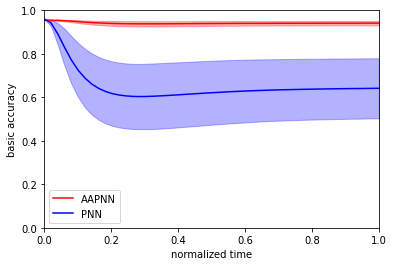

In [26]:
K_valid = mean_acc_PNN.shape[0]
plt.fill_between(np.linspace(0,1,K_valid), mean_acc_AAPNN-std_acc_AAPNN, mean_acc_AAPNN+std_acc_AAPNN, alpha=0.3, color='red');
plt.fill_between(np.linspace(0,1,K_valid), mean_acc_PNN-std_acc_PNN, mean_acc_PNN+std_acc_PNN, alpha=0.3, color='blue');

plt.plot(np.linspace(0,1,K_valid), mean_acc_AAPNN, label='AAPNN', color='red');
plt.plot(np.linspace(0,1,K_valid), mean_acc_PNN, label='PNN', color='blue');

plt.xlabel('normalized time');
plt.ylabel('basic accuracy');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.legend();

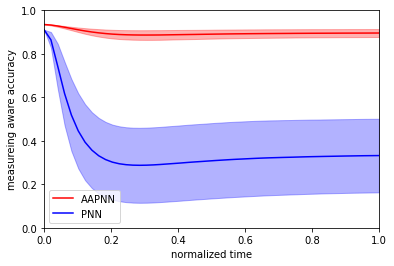

In [27]:
plt.fill_between(np.linspace(0,1,K_valid), mean_maa_AAPNN-std_maa_AAPNN, mean_maa_AAPNN+std_maa_AAPNN, alpha=0.3, color='red');
plt.fill_between(np.linspace(0,1,K_valid), mean_maa_PNN-std_maa_PNN, mean_maa_PNN+std_maa_PNN, alpha=0.3, color='blue');

plt.plot(np.linspace(0,1,K_valid), mean_maa_AAPNN, label='AAPNN', color='red');
plt.plot(np.linspace(0,1,K_valid), mean_maa_PNN, label='PNN', color='blue');

plt.xlabel('normalized time');
plt.ylabel('measureing aware accuracy');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.legend();